In [1]:
import joblib
import re
import string

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence.lower()

data = pd.read_csv('Data-with-Label.csv')
data['prompt'] = data['prompt'].apply(preprocess_text)

In [3]:
vectorizer = CountVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words='english')
X = vectorizer.fit_transform(data['prompt']).toarray()

tfidf_vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['prompt']).toarray()
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.52798457]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.70710678]
 [0.         0.         0.         ... 0.         0.         0.70710678]
 [0.         0.         0.         ... 0.         0.         0.70710678]]


In [4]:
# Create a list of labels
labels = ['special', 'chat',]

# Create an instance of LabelEncoder
le = LabelEncoder()
yNgu = le.fit_transform(labels)

z = data['category'].map({'special': 1, 'chat': 0})
y = z
filtered_array = [num for num in z if num == 1]
print(yNgu)

[1 0]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# classifier = SGDClassifier(max_iter=1600)
# classifier.fit(X_train, y_train)
print(y_test)
classifier = SGDClassifier(max_iter=1, warm_start=True)
for i in range(1600):
    classifier.partial_fit(X_train, y_train, classes=np.unique(y_train))

44     0
47     1
4      0
55     0
26     1
64     0
73     0
10     1
40     0
107    1
18     1
62     1
11     0
36     0
89     0
91     0
109    1
0      0
88     0
104    0
65     0
45     0
31     0
70     0
Name: category, dtype: int64


In [39]:
y_pred = classifier.predict(X_test)
myAccuracy = accuracy_score(y_test, y_pred)
myConfusion_matrix = confusion_matrix(y_test, y_pred)
myClassification_report = classification_report(y_test, y_pred)


print("Accuracy1:", myAccuracy)
print("Confusion Matrix:\n", myConfusion_matrix)
print("Classification Report:\n", myClassification_report)

Accuracy1: 0.75
Confusion Matrix:
 [[17  0]
 [ 6  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.14      0.25         7

    accuracy                           0.75        24
   macro avg       0.87      0.57      0.55        24
weighted avg       0.82      0.75      0.67        24



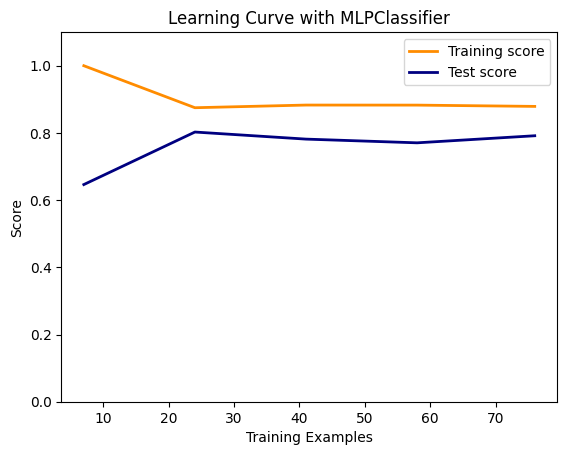

In [8]:
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(30,), max_iter=1600), X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Learning Curve with MLPClassifier")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(train_sizes, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.plot(train_sizes, test_scores_mean, label="Test score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

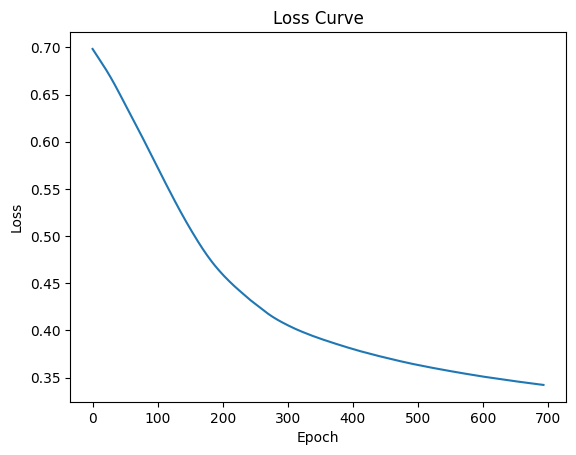

Training epoch 1/1600
Iteration 1, loss = 0.74746739
Training epoch 2/1600
Iteration 2, loss = 0.71126821
Training epoch 3/1600
Iteration 3, loss = 0.67469957
Training epoch 4/1600
Iteration 4, loss = 0.64495294
Training epoch 5/1600
Iteration 5, loss = 0.62475097
Training epoch 6/1600
Iteration 6, loss = 0.61449232
Training epoch 7/1600
Iteration 7, loss = 0.61078784
Training epoch 8/1600
Iteration 8, loss = 0.60986989
Training epoch 9/1600
Iteration 9, loss = 0.60838344
Training epoch 10/1600
Iteration 10, loss = 0.60430780
Training epoch 11/1600
Iteration 11, loss = 0.59737075
Training epoch 12/1600
Iteration 12, loss = 0.58889344
Training epoch 13/1600
Iteration 13, loss = 0.57982923
Training epoch 14/1600
Iteration 14, loss = 0.57099954
Training epoch 15/1600
Iteration 15, loss = 0.56303876
Training epoch 16/1600
Iteration 16, loss = 0.55583106
Training epoch 17/1600
Iteration 17, loss = 0.54922319
Training epoch 18/1600
Iteration 18, loss = 0.54240803
Training epoch 19/1600
Itera

Training epoch 158/1600
Iteration 158, loss = 0.25601090
Training epoch 159/1600
Iteration 159, loss = 0.25581747
Training epoch 160/1600
Iteration 160, loss = 0.25560869
Training epoch 161/1600
Iteration 161, loss = 0.25543029
Training epoch 162/1600
Iteration 162, loss = 0.25526704
Training epoch 163/1600
Iteration 163, loss = 0.25510873
Training epoch 164/1600
Iteration 164, loss = 0.25498688
Training epoch 165/1600
Iteration 165, loss = 0.25481962
Training epoch 166/1600
Iteration 166, loss = 0.25470110
Training epoch 167/1600
Iteration 167, loss = 0.25457403
Training epoch 168/1600
Iteration 168, loss = 0.25454638
Training epoch 169/1600
Iteration 169, loss = 0.25451705
Training epoch 170/1600
Iteration 170, loss = 0.25450717
Training epoch 171/1600
Iteration 171, loss = 0.25441708
Training epoch 172/1600
Iteration 172, loss = 0.25446389
Training epoch 173/1600
Iteration 173, loss = 0.25437466
Training epoch 174/1600
Iteration 174, loss = 0.25457590
Training epoch 175/1600
Iterati

Training epoch 272/1600
Iteration 272, loss = 0.25249340
Training epoch 273/1600
Iteration 273, loss = 0.25173992
Training epoch 274/1600
Iteration 274, loss = 0.25284113
Training epoch 275/1600
Iteration 275, loss = 0.25175034
Training epoch 276/1600
Iteration 276, loss = 0.25287090
Training epoch 277/1600
Iteration 277, loss = 0.25177448
Training epoch 278/1600
Iteration 278, loss = 0.25292798
Training epoch 279/1600
Iteration 279, loss = 0.25167613
Training epoch 280/1600
Iteration 280, loss = 0.25263204
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 281/1600
Iteration 281, loss = 0.25142209
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 282/1600
Iteration 282, loss = 0.25233334
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 283/1600
Iteration 283, loss = 0.25118308
Training epoch 284/1600
Iteration 284, loss = 

Iteration 385, loss = 0.24901612
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 386/1600
Iteration 386, loss = 0.24987978
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 387/1600
Iteration 387, loss = 0.24895340
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 388/1600
Iteration 388, loss = 0.24974914
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 389/1600
Iteration 389, loss = 0.24882360
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 390/1600
Iteration 390, loss = 0.24960345
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 391/1600
Iteration 391, loss = 0.24869591
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopp

Training epoch 443/1600
Iteration 443, loss = 0.24737729
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 444/1600
Iteration 444, loss = 0.24793469
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 445/1600
Iteration 445, loss = 0.24732844
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 446/1600
Iteration 446, loss = 0.24789347
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 447/1600
Iteration 447, loss = 0.24733472
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 448/1600
Iteration 448, loss = 0.24790229
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 449/1600
Iteration 449, loss = 0.24731271
Training loss did not improve more than tol=0.000100 for 10 c

Iteration 503, loss = 0.24651464
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 504/1600
Iteration 504, loss = 0.24690154
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 505/1600
Iteration 505, loss = 0.24646102
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 506/1600
Iteration 506, loss = 0.24687226
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 507/1600
Iteration 507, loss = 0.24645018
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 508/1600
Iteration 508, loss = 0.24688393
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 509/1600
Iteration 509, loss = 0.24642973
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopp

Iteration 567, loss = 0.24591339
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 568/1600
Iteration 568, loss = 0.24627019
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 569/1600
Iteration 569, loss = 0.24589964
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 570/1600
Iteration 570, loss = 0.24623594
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 571/1600
Iteration 571, loss = 0.24590498
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 572/1600
Iteration 572, loss = 0.24628095
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 573/1600
Iteration 573, loss = 0.24595344
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopp

Training epoch 673/1600
Iteration 673, loss = 0.24536883
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 674/1600
Iteration 674, loss = 0.24563867
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 675/1600
Iteration 675, loss = 0.24532991
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 676/1600
Iteration 676, loss = 0.24562074
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 677/1600
Iteration 677, loss = 0.24532295
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 678/1600
Iteration 678, loss = 0.24559608
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 679/1600
Iteration 679, loss = 0.24532415
Training loss did not improve more than tol=0.000100 for 10 c

Iteration 785, loss = 0.24490474
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 786/1600
Iteration 786, loss = 0.24513455
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 787/1600
Iteration 787, loss = 0.24487467
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 788/1600
Iteration 788, loss = 0.24510711
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 789/1600
Iteration 789, loss = 0.24486615
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 790/1600
Iteration 790, loss = 0.24509432
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 791/1600
Iteration 791, loss = 0.24483974
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopp

Training epoch 895/1600
Iteration 895, loss = 0.24447370
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 896/1600
Iteration 896, loss = 0.24465589
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 897/1600
Iteration 897, loss = 0.24445458
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 898/1600
Iteration 898, loss = 0.24462263
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 899/1600
Iteration 899, loss = 0.24444848
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 900/1600
Iteration 900, loss = 0.24463945
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 901/1600
Iteration 901, loss = 0.24444290
Training loss did not improve more than tol=0.000100 for 10 c

Iteration 951, loss = 0.24436127
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 952/1600
Iteration 952, loss = 0.24453659
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 953/1600
Iteration 953, loss = 0.24435046
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 954/1600
Iteration 954, loss = 0.24451668
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 955/1600
Iteration 955, loss = 0.24433348
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 956/1600
Iteration 956, loss = 0.24449144
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 957/1600
Iteration 957, loss = 0.24434699
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopp

Iteration 1009, loss = 0.24401666
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1010/1600
Iteration 1010, loss = 0.24415213
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1011/1600
Iteration 1011, loss = 0.24401852
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1012/1600
Iteration 1012, loss = 0.24415759
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1013/1600
Iteration 1013, loss = 0.24403882
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1014/1600
Iteration 1014, loss = 0.24418943
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1015/1600
Iteration 1015, loss = 0.24405631
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Training epoch 1065/1600
Iteration 1065, loss = 0.24418569
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1066/1600
Iteration 1066, loss = 0.24433840
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1067/1600
Iteration 1067, loss = 0.24416041
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1068/1600
Iteration 1068, loss = 0.24430102
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1069/1600
Iteration 1069, loss = 0.24411991
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1070/1600
Iteration 1070, loss = 0.24424035
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1071/1600
Iteration 1071, loss = 0.24406368
Training loss did not improve more than tol=0.0

Iteration 1153, loss = 0.24400179
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1154/1600
Iteration 1154, loss = 0.24414194
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1155/1600
Iteration 1155, loss = 0.24398911
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1156/1600
Iteration 1156, loss = 0.24412523
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1157/1600
Iteration 1157, loss = 0.24397062
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1158/1600
Iteration 1158, loss = 0.24410598
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1159/1600
Iteration 1159, loss = 0.24395469
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Iteration 1240, loss = 0.24366963
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1241/1600
Iteration 1241, loss = 0.24355312
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1242/1600
Iteration 1242, loss = 0.24363812
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1243/1600
Iteration 1243, loss = 0.24353161
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1244/1600
Iteration 1244, loss = 0.24359239
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1245/1600
Iteration 1245, loss = 0.24348958
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1246/1600
Iteration 1246, loss = 0.24354686
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Iteration 1331, loss = 0.24376361
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1332/1600
Iteration 1332, loss = 0.24386778
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1333/1600
Iteration 1333, loss = 0.24372983
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1334/1600
Iteration 1334, loss = 0.24382144
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1335/1600
Iteration 1335, loss = 0.24371429
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1336/1600
Iteration 1336, loss = 0.24380706
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1337/1600
Iteration 1337, loss = 0.24367105
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Training epoch 1424/1600
Iteration 1424, loss = 0.24377441
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1425/1600
Iteration 1425, loss = 0.24365227
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1426/1600
Iteration 1426, loss = 0.24375169
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1427/1600
Iteration 1427, loss = 0.24363144
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1428/1600
Iteration 1428, loss = 0.24372771
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1429/1600
Iteration 1429, loss = 0.24361240
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1430/1600
Iteration 1430, loss = 0.24370795
Training loss did not improve more than tol=0.0

Iteration 1513, loss = 0.24351670
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1514/1600
Iteration 1514, loss = 0.24361619
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1515/1600
Iteration 1515, loss = 0.24354699
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1516/1600
Iteration 1516, loss = 0.24365967
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1517/1600
Iteration 1517, loss = 0.24359402
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1518/1600
Iteration 1518, loss = 0.24371415
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training epoch 1519/1600
Iteration 1519, loss = 0.24360434
Training loss did not improve more than tol=0.000100 for 10 consecutive 

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1600)
history = clf.fit(X_train, y_train)

# plot the loss curve
plt.plot(history.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# # plot the accuracy curve
# plt.plot(history.score(X_train, y_train))
# plt.plot(history.score(X_test, y_test))
# plt.title('Accuracy Curves')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Test'])
# plt.show()

clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1600, alpha=0.0001, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
n_epochs = 1600
train_accs = np.zeros(n_epochs)
val_accs = np.zeros(n_epochs)
train_losses = np.zeros(n_epochs)
val_losses = np.zeros(n_epochs)

for i in range(n_epochs):
    print(f"Training epoch {i+1}/{n_epochs}")
    # train the model on the training set for one epoch
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # compute the training and validation accuracies and losses
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accs[i] = accuracy_score(y_train, y_train_pred)
    val_accs[i] = accuracy_score(y_test, y_test_pred)
    train_losses[i] = log_loss(y_train, y_train_pred)
    val_losses[i] = log_loss(y_test, y_test_pred)
